In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df = pd.read_csv("F:/Kaggle/E-Commerce-Analysis/customer_shopping_data.csv")
# print the columns of all dataframes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [ ]:
#將日期轉為正確格式，3/6/2022 → 03/06/2022
df["invoice_date_d"] = df["invoice_date"].str.split('/', expand=True)[0].apply(lambda x: x if len(x)>1 else "0"+x)
df["invoice_date_m"] = df["invoice_date"].str.split('/', expand=True)[1].apply(lambda x: x if len(x)>1 else "0"+x)
df["invoice_date_y"] = df["invoice_date"].str.split('/', expand=True)[2]

In [101]:
df["invoice_date"] = df["invoice_date_y"] + "-" + df["invoice_date_m"] + "-" + df["invoice_date_d"]
df["invoice_date_n"] = pd.to_datetime(df["invoice_date"])
print(df["invoice_date"].max())
print(df["invoice_date"].min())

2023-03-08
2021-01-01


In [102]:
#1: 計算2021/01/01 - 2023/03/08 月營收
revenue = df[["invoice_date_y", "invoice_date_m", "quantity", "price"]].groupby(["invoice_date_y","invoice_date_m"]).agg('sum').sort_values(by=["invoice_date_y","invoice_date_m"]).reset_index()
invoice_date_y_m = revenue["invoice_date_y"].astype(str) + "-" + revenue["invoice_date_m"].astype(str)
revenue.insert(0, "invoice_date_y_m", invoice_date_y_m)
revenue

,invoice_date_y_m,invoice_date_y,invoice_date_m,quantity,price
0,2021-01,2021,01,11483,2656422.78
1,2021-02,2021,02,10179,2358636.34
2,2021-03,2021,03,11383,2618434.14
3,2021-04,2021,04,11270,2558825.62
4,2021-05,2021,05,11620,2662369.93
5,2021-06,2021,06,11352,2547239.73
6,2021-07,2021,07,11986,2802468.58
7,2021-08,2021,08,11205,2632303.32
8,2021-09,2021,09,10901,2530305.88
9,2021-10,2021,10,11711,2782418.40


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

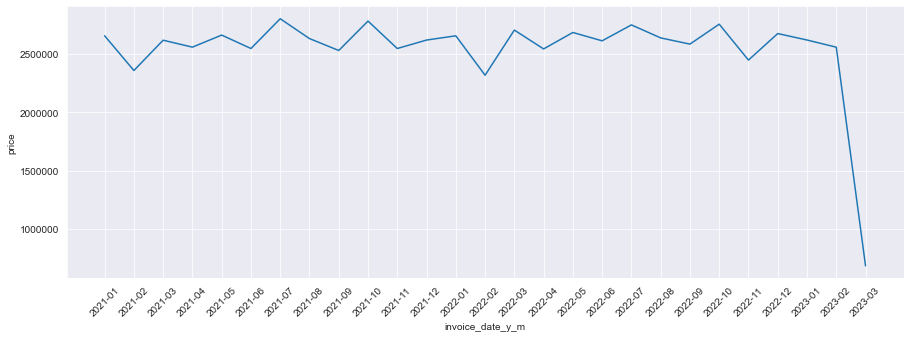

In [121]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.set_style("darkgrid")
sns.lineplot(data=revenue, x="invoice_date_y_m", y="price")
ax.yaxis.get_major_formatter().set_scientific(False)
#ax.yaxis.get_major_formatter().set_useOffset(False)
plt.xticks(rotation=45)

##改xy軸還有刻度

In [79]:
df["invoice_date_y"] = df["invoice_date"].dt.year.astype(int)
df["invoice_date_m"] = df["invoice_date"].dt.month.astype(int)

"At our system each order is assigned to a unique customer_id. This means that the same customer will get different ids for different orders. The purpose of having a customer_unique_id on the dataset is to allow you to identify customers that made repurchases at the store. Otherwise you would find that each order had a different customer associated with."

使用 customer_unique_id 辨識消費者是否為新舊客。


In [112]:
#合併 df_orders, df_order_payments 兩個檔案取得訂單資訊：訂單id、消費者id、訂單時間、訂單金額、結帳方式...
#消費者可以把一張訂單拆成不同付費方式(credit card + voucher)，所以 df_order_payments 筆數比較多
order_data = pd.merge(df_orders, df_order_payments, on="order_id")


In [ ]:
#扣掉 order_status = cancel 的欄位
revenue = order_data[order_data["order_status"] != "canceled"].groupby(["order_purchase_y","order_purchase_m"]).agg('sum').sort_values(by=["order_purchase_y","order_purchase_m"]).reset_index()
revenue["order_purchase_y_m"] = revenue["order_purchase_y"].astype(str) + "-" + revenue["order_purchase_m"].astype(str)
revenue

消費人數(分新舊客)、人均訂單數、客單價

In [108]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100756 entries, 0 to 103885
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       100756 non-null  object        
 1   customer_id                    100756 non-null  object        
 2   order_status                   100756 non-null  object        
 3   order_purchase_timestamp       100756 non-null  datetime64[ns]
 4   order_approved_at              100742 non-null  object        
 5   order_delivered_carrier_date   100754 non-null  object        
 6   order_delivered_customer_date  100748 non-null  object        
 7   order_estimated_delivery_date  100756 non-null  object        
 8   payment_sequential             100756 non-null  int64         
 9   payment_type                   100756 non-null  object        
 10  payment_installments           100756 non-null  int64         
 11  

In [142]:
#2016 - 2018 人均訂單數

order_count = order_data[order_data["order_status"] != "canceled"].groupby("order_purchase_y").agg("count")
customer_id_count = order_data[order_data["order_status"] != "canceled"].groupby("order_purchase_y")["customer_id"].nunique()
order_count


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_purchase_m,order_purchase_y_m,order_purchase_date
order_purchase_y,,,,,,,,,,,,,,,
2016,320,320,320,320,320,293,283,320,320,320,320,320,320,320,320
2017,47235,47235,47235,47235,47217,46296,45723,47235,47235,47235,47235,47235,47235,47235,47235
2018,55667,55667,55667,55667,55666,55331,54742,55667,55667,55667,55667,55667,55667,55667,55667


In [141]:
customer_id_count

order_purchase_y  customer_id                     
2016              16e14c1e6e050fe6730c961ff638ca23    7
                  02cb3a8ef6e13d37560379559e2f533d    3
                  1cbeb91a58bd89ee2df1bc32f3311209    3
                  031f08a1ebdcfb5e706831bf64de3860    2
                  3dc7eb6da6c008460353d9a171e8fe6d    2
                                                     ..
2018              fff93c1da78dafaaa304ff032abc6205    1
                  fffb97495f78be80e2759335275df2aa    1
                  fffcb937e9dd47a13f05ecb8290f4d3e    1
                  fffeda5b6d849fbd39689bb92087f431    1
                  ffff42319e9b2d713724ae527742af25    1
Name: customer_id, Length: 98815, dtype: int64